# Featur Engineering

In [23]:
# import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import chi2

# 1.1 Load Data

In [24]:
train = pd.read_csv("train.csv")
val = pd.read_csv("val.csv")

explore = pd.concat([train, val], axis=0)
explore.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,n,v,u
1,p,f,y,n,f,s,f,c,n,b,...,s,p,p,p,w,o,e,w,v,p
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,k,n,m
3,p,f,y,g,f,f,f,c,b,g,...,k,p,n,p,w,o,l,h,y,p
4,e,x,s,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,n,s,g


In [25]:
test = pd.read_csv("test.csv")

# 1.2 Remove Veil Type

In [26]:
for ds in [train, val, test]:
    ds.drop("veil-type", axis=1, inplace=True)
    
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,w,t,p,f,c,n,p,...,s,s,w,w,w,o,p,n,v,u
1,p,f,y,n,f,s,f,c,n,b,...,k,s,p,p,w,o,e,w,v,p
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,k,n,m
3,p,f,y,g,f,f,f,c,b,g,...,k,k,p,n,w,o,l,h,y,p
4,e,x,s,y,t,a,f,c,b,n,...,s,s,w,w,w,o,p,n,s,g


# 2.1 Create New Features

In [27]:
explore.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [28]:
# make groups of features for species identification
cap = []
gill = []
stalk = []

explore.drop("veil-type", axis=1, inplace=True)
for col in explore.columns:
    if col.startswith("cap"):
        cap.append(col)
    elif col.startswith("gill"):
        gill.append(col)
    elif col.startswith("stalk"):
        stalk.append(col)
        
print(cap)
print(gill)
print(stalk)
    

['cap-shape', 'cap-surface', 'cap-color']
['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']
['stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring']


In [29]:
def add_feats(df):
    df["united_cap"] = df[cap[0]] + df[cap[1]] + df[cap[2]]
    df["united_gill"] = df[gill[0]] + df[gill[1]] + df[gill[2]] + df[gill[3]]
    df["united_stalk"] = df[stalk[0]] + df[stalk[1]] + df[stalk[2]] + df[stalk[3]] + df[stalk[4]] + df[stalk[5]]
    return df

In [30]:
explore = add_feats(explore)

# 3.1 One Hot Encoding

In [38]:
def one_hot_encode(df):
    new_df = df
    for col in df.columns:
        dummies = pd.get_dummies(df[col], drop_first=True, prefix=col)
        new_df = pd.concat([new_df, dummies], axis=1)
        new_df.drop(col, axis=1, inplace=True)
        
    return new_df

In [40]:
train = one_hot_encode(train)
train.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [41]:
val = one_hot_encode(val)
test = one_hot_encode(test)

In [42]:
explore = one_hot_encode(explore)

# 4.1 Tests: Correlation

In [48]:
corrs = dict(explore.corr()["class_p"])
corrs

{'class_p': 1.0,
 'cap-shape_c': 0.023098385876227513,
 'cap-shape_f': 0.011879178401557366,
 'cap-shape_k': 0.16419807328669578,
 'cap-shape_s': -0.06042510320685515,
 'cap-shape_x': -0.030936273121609407,
 'cap-surface_g': 0.018858204863762145,
 'cap-surface_s': 0.09459558151681842,
 'cap-surface_y': 0.08930876435294306,
 'cap-color_c': -0.03022038612243965,
 'cap-color_e': 0.09461628442123114,
 'cap-color_g': -0.052411129581203926,
 'cap-color_n': -0.03829032229295747,
 'cap-color_p': 0.0287723597210353,
 'cap-color_r': -0.04086424537999527,
 'cap-color_u': -0.046112460359795236,
 'cap-color_w': -0.1338498256367622,
 'cap-color_y': 0.12012706049417296,
 'bruises_t': -0.5086938492084345,
 'odor_c': 0.16477198933309525,
 'odor_f': 0.6249911532681269,
 'odor_l': -0.21441519939878162,
 'odor_m': 0.0719695941931636,
 'odor_n': -0.7896208723789789,
 'odor_p': 0.1815774715537415,
 'odor_s': 0.2907018994029724,
 'odor_y': 0.28353233081794615,
 'gill-attachment_f': 0.12455996252125773,
 'gil

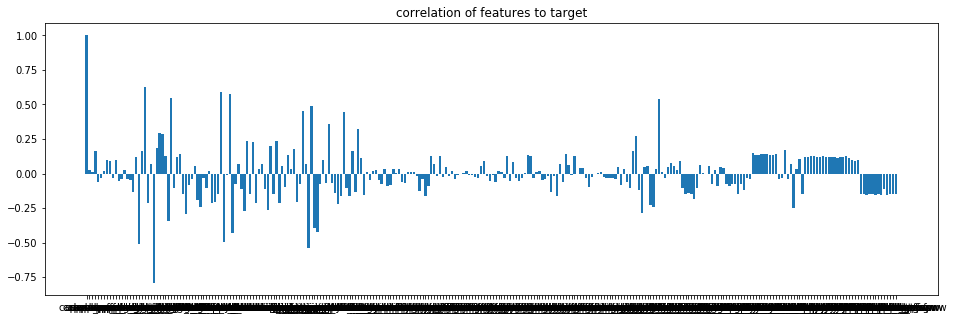

In [51]:
feats = []
corr_vals = []

for key, value in corrs.items():
    feats.append(key)
    corr_vals.append(value)
    
plt.figure(figsize=(16, 5))
plt.bar(feats, corr_vals)
plt.title("correlation of features to target")
plt.show()

# 4.2 Tests: Chi2

In [57]:
labels = explore.columns
results = chi2(explore, explore['class_p'])

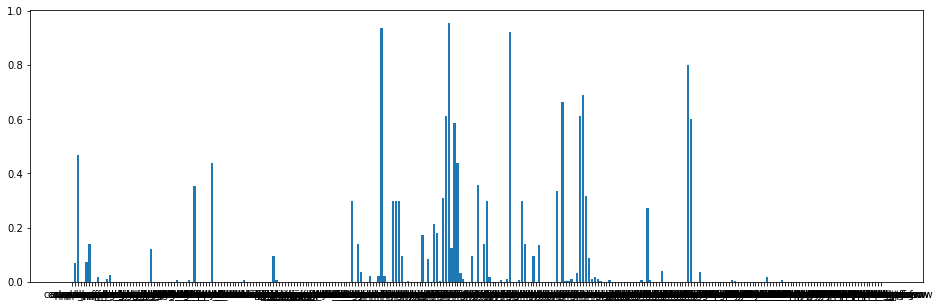

In [62]:
plt.figure(figsize=(16, 5))
plt.bar(explore.columns, results[1])
plt.show()